In [17]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 613.3/613.3 kB 3.2 MB/s eta 0:00:00
  Using cached Cython-3.0.11-cp310-cp310-win_amd64.whl (2.8 MB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [4]:
df = pd.read_csv('../data/cleaned-GlobalLandTemperatures.csv')

### Convert dt column into datetime

In [5]:
df['dt'] = pd.to_datetime(df['dt'])

### Split the dataset into train and test sets

In [6]:
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

### Fit an ARIMA model on the training set

In [ ]:
model = auto_arima(train['AverageTemperature'], seasonal = False, stepwise = True, suppress_warnings=True)

### Make predictions on the test data

In [ ]:
forecast_arima = model_arima.predict(n_periods = len(test))

### Calculate Evaluation metrics

In [ ]:
mae_arima = mean_absolute_error(test['AverageTemperature'], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test['AverageTemperature'], forecast_arima))
mape_arima = np.mean(np.abs((test['AverageTemperature'] - forecast_arima) / test['AverageTemperature'])) * 100

In [ ]:
print(f'ARIMA MAE: {mae_arima}')
print(f'ARIMA RMSE: {rmse_arima}')
print(f'ARIMA MAPE: {mape_arima}')

### Plot ARIMA predictions and actual values

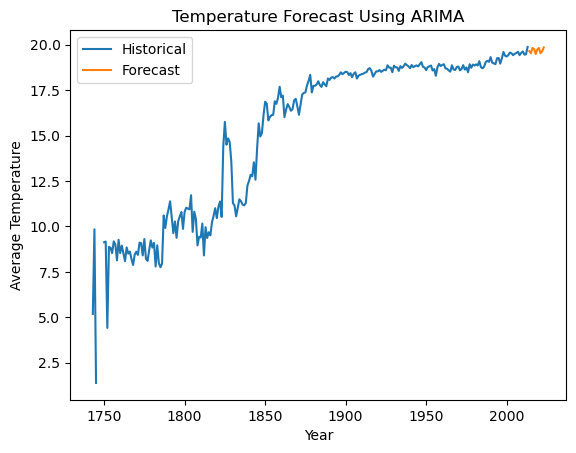

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(test['date'], test['AverageTemperature'], label='Actual', color='blue')
plt.plot(test['date'], forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()